# Convolutional Neural Network (CNN)
**"mlp_mnist"**

- Baik digunakan untuk data yang kecil
- Banyaknya *edges* adalah banyaknya parameter yang digunakan
- Untuk meminimalisir *edges* makanya digunakan *share edge*

### Deep Learning Architecture

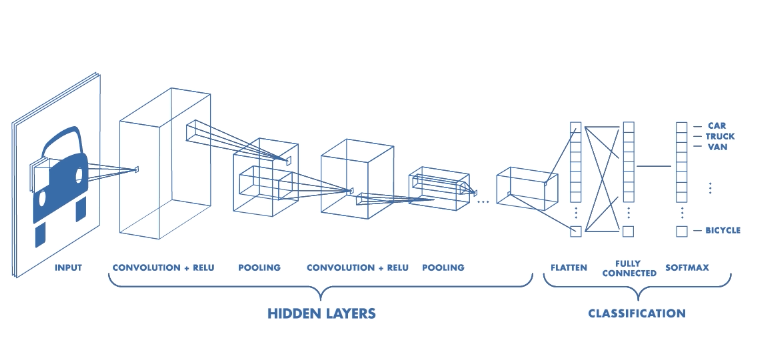

In [0]:
from IPython.display import Image
Image('CNN.jpg')

**Image**
- Beberapa bagian dalam image kecil
- Maka akan diambil beberapa bagian dari image yang akan diamati lebih lanjut
- Kemudian part of the image tersebut yang akan dianalisis dengan menggunakan CNN

**Part of the image**
- Bagian dari gambar yang akan dianalisis tidak selalu sama bentuknya dan letaknya. Misal bentuk paruh buruh berbeda-beda dan letaknya tidak selalu sama dalam berbagai gambar.
- Hal yang beda ini akan digunakan share weight

**Convolutional Layer**
- Banyaknya filter pada CNN digunakan untuk mengambil beragam data pada image training. Sehingga mendapatkan data (misalnya paruh buruh) yang beragam.

**Convolution** <br>
- Misal filter 3 x 3
- filternya jangan terlalu besar karena jika yang diteliti adalah objek yang kecil dikhawatirkan tidak terlihat
- Dengan filter tsb digunakan Stride = 1
- Maka pada convolution akan menghitung matriks 3 x 3 dengan arah gerak ke kanan sebanyak 1 blok.
- Hasil dari setiap iterasi adalah dot product dari matriks yang terbentuk
- Untuk nilai awal dari setiap baris output adalah determinan dari matriks pertama

**The whole convolution pipeline**
- image
- convolution (repeated)
- max pooling (repeated)
- convolution (repeated)
- max pooling (repeated)
- Flattened
- Fully Connected Feedforwarded Network / KNN / dll

**Why Pooling**
- dengan sunsampling tidak akan mengubah objek. Misalnya hanya diambil sebagian tidak akan mengubah objek pada image. Misal image burung maka akan tetap jadi burung.
- subsampling pixel akan membuat gambar menjadi lebih kecil --> fewer parameter untuk characterize image

**CNN compress FCN in two ways** <br>
Dengan adanya max pooling : 
- reducing number of connections
- shared weightks on the edges
- max pooling further reduces the complexity

**CNN in Keras** <br>
...........

In [0]:
# import library
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
#
from sklearn.datasets.samples_generator import make_blobs
#
from tensorflow.keras.callbacks import ModelCheckpoint

In [0]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [0]:
# hyperparameter
# hyperparameter adalah parameter dimana kita dapat menentukan nilai epoch dan alpha (learning rate)
# train parameter adalah parameter hasil dari pelatihan dari machine learning

EPOCHS = 100
ALPHA = 0.01

# alpha adalah langkah untuk mencari minimum fungsi loss (gradient descent)

# generate data
(X,y)=make_blobs(n_samples=250,n_features=2, centers=2, cluster_std=1.05)

In [0]:
X[:5]

array([[ 8.87100991,  1.12771716],
       [ 3.09937809, -2.92898602],
       [ 3.96913388, -5.50871678],
       [ 4.22469227, -4.94938368],
       [ 8.58495561,  1.23234189]])

In [0]:
# tambahkan bias term pada X
X=np.c_[np.ones((X.shape[0])), X]

X[:5]

array([[ 1.        ,  1.        ,  8.87100991,  1.12771716],
       [ 1.        ,  1.        ,  3.09937809, -2.92898602],
       [ 1.        ,  1.        ,  3.96913388, -5.50871678],
       [ 1.        ,  1.        ,  4.22469227, -4.94938368],
       [ 1.        ,  1.        ,  8.58495561,  1.23234189]])

In [0]:
# inisialisasi Weight (W) dan list loss

# andaikan W adalah nilai random dari kumpulan angka yang menyebar uniform (seragam)
W=np.random.uniform(size=X.shape[1],)
# note : tambahkan ',' dibelakang, agar W menjadi format tuple, bukan float. 

# define losshistory sebagai array kosong
lossHistory = []

In [0]:
W

array([0.91235105, 0.78670656, 0.10513534, 0.13979122])

In [0]:

# loop training sesuai epochs
for epoch in range(EPOCHS):
  pred = sigmoid (X.dot(W))
# X.dot(W) adalah perkalian matriks tanpa menggunakan looping masing-masing element

In [0]:

# loop training sesuai epochs

for epoch in range (EPOCHS):
  preds = sigmoid(X.dot(W))
  error = preds - y
  loss = np.sum(error ** 2)
  # ** pengertiannya adalah pangkat
  # loss seperti mencari squared error
  lossHistory.append(loss)

  print('epoch ke-{}, loss {}'.format(epoch+1, loss))

  gradient = X.T.dot(error) / X.shape[0]
  #T adalah transpose

  #update weight
  W = W - ALPHA*gradient

epoch ke-1, loss 90.0005386880933
epoch ke-2, loss 85.08538226333872
epoch ke-3, loss 80.00908096653103
epoch ke-4, loss 74.88961035440497
epoch ke-5, loss 69.84593481021255
epoch ke-6, loss 64.9859068825001
epoch ke-7, loss 60.39677602121536
epoch ke-8, loss 56.13996330278233
epoch ke-9, loss 52.250342974333186
epoch ke-10, loss 48.73909123155546
epoch ke-11, loss 45.598606540471145
epoch ke-12, loss 42.80806000103928
epoch ke-13, loss 40.3385418228884
epoch ke-14, loss 38.15725446980446
epoch ke-15, loss 36.23059356130391
epoch ke-16, loss 34.526199782699656
epoch ke-17, loss 33.01417650542663
epoch ke-18, loss 31.66769175261444
epoch ke-19, loss 30.4631605386634
epoch ke-20, loss 29.38016317753314
epoch ke-21, loss 28.401213250009192
epoch ke-22, loss 27.51145300439179
epoch ke-23, loss 26.698326232164234
epoch ke-24, loss 25.951258697166224
epoch ke-25, loss 25.261362589248357
epoch ke-26, loss 24.621172638578322
epoch ke-27, loss 24.024416073870114
epoch ke-28, loss 23.46581544615

In [0]:
# APA YANG TERJADI JIKA : NAIKKAN EPOCHS DAN KECILKAN ALPHA ?
# Terlihat bahwa saat kita naikkan epoch dan turunkan alpha, nilai loss akan semakin kecil. Namun, hal ini mungkin hanya terjadi di kasus ini saja. Bisa jadi, dikasus lain tidak. Oleh karena itu, EPOCHS dan ALPHA adalah hyperparameters yang dapat diubah sesuai dengan kondisi masalah.
EPOCHS = 200
ALPHA = 0.001

W=np.random.uniform(size=X.shape[1],)
lossHistory = []

for epoch in range(EPOCHS):
  pred = sigmoid (X.dot(W))



for epoch in range (EPOCHS):
  preds = sigmoid(X.dot(W))
  error = preds - y
  loss = np.sum(error ** 2)
  lossHistory.append(loss)

  print('epoch ke-{}, loss {}'.format(epoch+1, loss))

  gradient = X.T.dot(error) / X.shape[0]

  W = W - ALPHA*gradient

epoch ke-1, loss 95.64193119465837
epoch ke-2, loss 95.22183019901779
epoch ke-3, loss 94.79862461736329
epoch ke-4, loss 94.37237577686045
epoch ke-5, loss 93.94314721489741
epoch ke-6, loss 93.51100465031558
epoch ke-7, loss 93.07601595108646
epoch ke-8, loss 92.63825109843089
epoch ke-9, loss 92.19778214738758
epoch ke-10, loss 91.7546831838481
epoch ke-11, loss 91.30903027808404
epoch ke-12, loss 90.86090143480402
epoch ke-13, loss 90.41037653978691
epoch ke-14, loss 89.95753730314914
epoch ke-15, loss 89.50246719931343
epoch ke-16, loss 89.04525140375715
epoch ke-17, loss 88.58597672662847
epoch ke-18, loss 88.12473154332845
epoch ke-19, loss 87.66160572216738
epoch ke-20, loss 87.19669054921312
epoch ke-21, loss 86.73007865045852
epoch ke-22, loss 86.26186391144458
epoch ke-23, loss 85.79214139448355
epoch ke-24, loss 85.3210072536362
epoch ke-25, loss 84.84855864760303
epoch ke-26, loss 84.37489365069901
epoch ke-27, loss 83.90011116208575
epoch ke-28, loss 83.4243108134431
epoc

In [0]:
# fungsi untuk melihat datanya itu bagaimana
def show_img(img):
  img = img.reshape((28,28)) #format shape(1 tuple, 2 elemen) bukan inetegr, kurung itu menentukan parameter # data 60Kx28x28
  plt.imshow(img)

In [0]:
# download data MNIST
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
# reshape
X_train = X_train.reshape(60000, 28, 28, 1) #(jumlah data, ukuran, ukuran,. chanel)
X_test = X_test.reshape(10000, 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 
X_test /= 255

# one hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [0]:
# Model Architecture
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(50, 
                                 kernel_size=(3,3), 
                                 activation='relu', 
                                 input_shape =(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(64, 
                                 kernel_size=(3,3), 
                                 activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, 
                                activation='relu'))
model.add(tf.keras.layers.Dense(10, 
                                activation='softmax'))
model.compile(loss='categorical_crossentropy', 
              optimizer = 'adam',
              metrics = ['accuracy'])


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
filename = 'model-{epoch:02d}-{val_acc: 2f}.h5'

In [0]:
# Loss and Accuracy Model
# disimpan per-epochnya
checkpoint = ModelCheckpoint('model.h5', 
                             monitor = 'val_acc', 
                             verbose=1,
                             save_best_only=True, 
                             mode ='max')
H = model.fit (X_train, y_train, 
               validation_split = 0.33, 
               epochs =10, 
               batch_size=128, 
               callbacks=[checkpoint])

Train on 40199 samples, validate on 19801 samples
Epoch 1/10
40064/40199 [============================>.] - ETA: 0s - loss: 0.1934 - acc: 0.9430
Epoch 00001: val_acc improved from -inf to 0.97874, saving model to model.h5
40199/40199 [==============================] - 10s 252us/sample - loss: 0.1931 - acc: 0.9431 - val_loss: 0.0709 - val_acc: 0.9787
Epoch 2/10
40064/40199 [============================>.] - ETA: 0s - loss: 0.0491 - acc: 0.9854
Epoch 00002: val_acc improved from 0.97874 to 0.98576, saving model to model.h5
40199/40199 [==============================] - 6s 161us/sample - loss: 0.0490 - acc: 0.9854 - val_loss: 0.0478 - val_acc: 0.9858
Epoch 3/10
40192/40199 [============================>.] - ETA: 0s - loss: 0.0283 - acc: 0.9911
Epoch 00003: val_acc did not improve from 0.98576
40199/40199 [==============================] - 6s 162us/sample - loss: 0.0283 - acc: 0.9911 - val_loss: 0.0547 - val_acc: 0.9835
Epoch 4/10
40192/40199 [============================>.] - ETA: 0s - lo

In [0]:
# evaluate with test
loss, accuracy = model.evaluate (X_test, y_test, verbose=0)
print("Acc : ", accuracy)

Acc :  0.9836
